In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
from helper_functions import load_data
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_lg")

def count_chars(text):
    return len(text)

def count_words(text):
    return len(text.split())

def count_capital_words(text):
    return sum(map(str.isupper, text.split()))

def count_sent(text):
    return len(nltk.sent_tokenize(text))

def count_unique_words(text):
    return len(set(text.split()))

def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

def preprocess(sent):
    sent = sent.lower() # lower case
    sent = re.sub('\s+', ' ', sent) # remove double spacing
    sent = re.sub('([0-9]+)', '', sent) # remove numbers
    sent_token_list = [word for word in sent.split(' ')]
    sent = ' '.join(sent_token_list)
    return sent

def count_direct_objects(text):
    print("Processing ...")
    doc_text = nlp(text)
    direct_object_counts = 0
    print("POS tagging and counting direct objects ...")
    for chunk in doc_text.noun_chunks:
        if chunk.root.dep_ == 'dobj':
            direct_object_counts += 1
    return(direct_object_counts)

# Load the data
text_data, labels = load_data('data')
df = pd.DataFrame(list(zip(text_data, labels)), columns=['text_data', 'label'])


Processing file: hemingway_bell_tolls.txt
Processing file: hemingway_sun_also.txt
Processing file: hemingway_in_our_time.txt
Processing file: hemingway_green_hills_africa.txt
Processing file: hemingway_three_stories_ten_poems.txt
Processing file: hemingway_across_the_river.txt
Processing file: hemingway_winner_take_nothing.txt
Processing file: hemingway_old_man.txt
Processing file: hemingway_farewell.txt
Processing file: hemingway_men_without_women.txt
Processing file: fitzgerald_flappers_and_philosophers.txt
Processing file: fitzgerald_tender_is.txt
Processing file: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_gatsby.txt
Processing file: fitzgerald_beautiful_and_damned.txt
Processing file: fitzgerald_the_vegtable.txt
Processing file: fitzgerald_tales_jazz_age.txt
Processing file: fitzgerald_this_side.txt
Processing file: fitzgerald_all_the_sad.txt
Processing file: hemingway_bell_tolls.txt
Processing file: hemingway_sun_also.txt
Processing file: hemingway_in_our_time.tx

In [2]:
# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2)

'''
for idx, row in train_df.iterrows():
    train_df.loc[idx, 'chars'] = count_chars(row['text_data'])
    train_df.loc[idx, 'words'] = count_words(row['text_data'])
    train_df.loc[idx, 'capital_words'] = count_capital_words(row['text_data'])
    train_df.loc[idx, 'sentence_count'] = count_sent(row['text_data'])
    train_df.loc[idx, 'unique_words'] = count_unique_words(row['text_data'])
    train_df.loc[idx, 'stopwords_count'] = count_stopwords(row['text_data'])
    train_df.loc[idx, 'direct_objects_count'] = count_direct_objects(row['text_data'])

for idx, row in test_df.iterrows():
    test_df.loc[idx, 'chars'] = count_chars(row['text_data'])
    test_df.loc[idx, 'words'] = count_words(row['text_data'])
    test_df.loc[idx, 'capital_words'] = count_capital_words(row['text_data'])
    test_df.loc[idx, 'sentence_count'] = count_sent(row['text_data'])
    test_df.loc[idx, 'unique_words'] = count_unique_words(row['text_data'])
    test_df.loc[idx, 'stopwords_count'] = count_stopwords(row['text_data'])
    test_df.loc[idx, 'direct_objects_count'] = count_direct_objects(row['text_data']) 
'''

# add engineered features with numerical indices
train_df['feat_0'] = train_df['text_data'].apply(count_chars)
train_df['feat_1'] = train_df['text_data'].apply(count_words)
train_df['feat_2'] = train_df['text_data'].apply(count_capital_words)
train_df['feat_3'] = train_df['text_data'].apply(count_sent)
train_df['feat_4'] = train_df['text_data'].apply(count_unique_words)
train_df['feat_5'] = train_df['text_data'].apply(count_stopwords)
train_df['feat_6'] = train_df['text_data'].apply(count_direct_objects)

test_df['feat_0'] = test_df['text_data'].apply(count_chars)
test_df['feat_1'] = test_df['text_data'].apply(count_words)
test_df['feat_2'] = test_df['text_data'].apply(count_capital_words)
test_df['feat_3'] = test_df['text_data'].apply(count_sent)
test_df['feat_4'] = test_df['text_data'].apply(count_unique_words)
test_df['feat_5'] = test_df['text_data'].apply(count_stopwords)
test_df['feat_6'] = test_df['text_data'].apply(count_direct_objects)

Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects .

In [3]:
# Create a TfidfVectorizer object and fit it on the training data
vectorizer = TfidfVectorizer()
train_tf_idf = vectorizer.fit_transform(train_df['text_data']).toarray()

In [4]:
# Apply the same vectorizer to the test data
test_tf_idf = vectorizer.transform(test_df['text_data']).toarray()
# Combine the tf-idf features with other engineered features
engineered_features = ['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6']
train_X = np.concatenate([train_tf_idf, train_df[engineered_features].values], axis=1)
test_X = np.concatenate([test_tf_idf, test_df[engineered_features].values], axis=1)

In [5]:
'''
# Combine the tf-idf features with other engineered features
train_X = np.concatenate([train_tf_idf, train_df[['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count', 'direct_objects_count']].values], axis=1)
test_X = np.concatenate([test_tf_idf, test_df[['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count', 'direct_objects_count']].values], axis=1)
'''

"\n# Combine the tf-idf features with other engineered features\ntrain_X = np.concatenate([train_tf_idf, train_df[['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count', 'direct_objects_count']].values], axis=1)\ntest_X = np.concatenate([test_tf_idf, test_df[['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count', 'direct_objects_count']].values], axis=1)\n"

In [6]:
# Extract the labels for the training and test sets
train_Y = train_df['label']
test_Y = test_df['label']

In [7]:
# Train a random forest classifier
rf = RandomForestClassifier()
rf.fit(train_X, train_Y)

RandomForestClassifier()

In [8]:
# Predict the labels for the test set
pred_Y = rf.predict(test_X)

In [9]:
# Print the classification report and confusion matrix
print(classification_report(test_Y, pred_Y))
print(confusion_matrix(test_Y, pred_Y))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4

[[1 2]
 [0 1]]


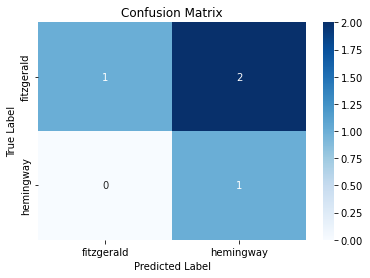

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# assume cm is the confusion matrix
cm = confusion_matrix(test_Y, pred_Y)

# create a list of class labels
classes = ['fitzgerald', 'hemingway']

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
importances = rf.feature_importances_

# Sort the features by their importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_tf_idf.shape[1]):
    print(f"{f+1}. feature {indices[f]} ({importances[indices[f]]})")

Feature ranking:
1. feature 6556 (0.02)
2. feature 10023 (0.02)
3. feature 19725 (0.01)
4. feature 18429 (0.01)
5. feature 8788 (0.01)
6. feature 13136 (0.01)
7. feature 2231 (0.01)
8. feature 3544 (0.01)
9. feature 2871 (0.01)
10. feature 11756 (0.01)
11. feature 27038 (0.01)
12. feature 12640 (0.01)
13. feature 22530 (0.01)
14. feature 19336 (0.01)
15. feature 27764 (0.01)
16. feature 13528 (0.01)
17. feature 3316 (0.01)
18. feature 1058 (0.01)
19. feature 5606 (0.01)
20. feature 7164 (0.01)
21. feature 9946 (0.01)
22. feature 22936 (0.01)
23. feature 26580 (0.01)
24. feature 17423 (0.01)
25. feature 27947 (0.01)
26. feature 26003 (0.01)
27. feature 28237 (0.01)
28. feature 18696 (0.01)
29. feature 15457 (0.01)
30. feature 27805 (0.01)
31. feature 10842 (0.01)
32. feature 15465 (0.01)
33. feature 17451 (0.01)
34. feature 1296 (0.01)
35. feature 5113 (0.01)
36. feature 1706 (0.01)
37. feature 23931 (0.01)
38. feature 28470 (0.01)
39. feature 18583 (0.01)
40. feature 26710 (0.01)
41. f

In [12]:
def get_top_n_features(feature_importances, feature_names, n):
    # Create a list of tuples with feature names and importance scores
    features = list(zip(feature_names, feature_importances))

    # Sort the list by importance score in descending order
    features.sort(key=lambda x: x[1], reverse=True)

    # Return the top n features
    return features[:n]

top_features = get_top_n_features(rf.feature_importances_, vectorizer.get_feature_names_out(), n=25)
print(top_features)

[('covering', 0.02), ('february', 0.02), ('acute', 0.01), ('agreed', 0.01), ('ale', 0.01), ('alert', 0.01), ('amused', 0.01), ('announced', 0.01), ('arrival', 0.01), ('astonishment', 0.01), ('beckoned', 0.01), ('blinking', 0.01), ('bobbed', 0.01), ('boredom', 0.01), ('chiefly', 0.01), ('choose', 0.01), ('clothed', 0.01), ('clutching', 0.01), ('coldly', 0.01), ('coming', 0.01), ('confined', 0.01), ('created', 0.01), ('dearest', 0.01), ('eagerness', 0.01), ('east', 0.01)]


In [13]:
feature_names = vectorizer.get_feature_names_out()

# Create a mapping between feature indices and feature names
feature_mapping = {}
for feature_index in range(len(feature_names)):
    feature_mapping[feature_index] = feature_names[feature_index]

# Print out the feature mapping
print(feature_mapping)

{0: '00', 1: '000', 2: '03', 3: '10', 4: '100', 5: '1000', 6: '100678', 7: '103', 8: '105', 9: '1088', 10: '11', 11: '118', 12: '11th_', 13: '12', 14: '13', 15: '1300', 16: '1305', 17: '132', 18: '1335', 19: '137th', 20: '14', 21: '15', 22: '158th', 23: '16', 24: '17', 25: '1700', 26: '1769', 27: '17th', 28: '18', 29: '1812', 30: '1831', 31: '1832', 32: '1844', 33: '1860', 34: '1861', 35: '1868', 36: '1870', 37: '1873', 38: '1879', 39: '1880', 40: '1881', 41: '1890', 42: '1895', 43: '1898', 44: '1899', 45: '19', 46: '1900', 47: '1902', 48: '1905', 49: '1906', 50: '1907', 51: '1908', 52: '1909', 53: '1910', 54: '1911', 55: '1912', 56: '1913', 57: '1914', 58: '1915', 59: '1916', 60: '1917', 61: '1918', 62: '1919', 63: '1920', 64: '1921', 65: '1922', 66: '1925', 67: '1929', 68: '1933', 69: '1934', 70: '1942', 71: '1st', 72: '1st_', 73: '20', 74: '200', 75: '201', 76: '206', 77: '20th', 78: '20th_', 79: '21', 80: '21st_', 81: '22', 82: '23', 83: '238', 84: '24', 85: '240', 86: '2432', 87: 

In [14]:
feature_importances = rf.feature_importances_
feature_importance_dict = {}
desired_features = ['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6']

for feature, importance in zip(desired_features, feature_importances):
    feature_importance_dict[feature] = importance

# Print the feature importances
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")


feat_0: 0.0
feat_1: 0.0
feat_2: 0.0
feat_3: 0.0
feat_4: 0.0
feat_5: 0.0
feat_6: 0.0


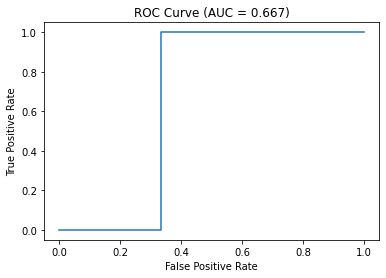

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for test set
probs = rf.predict_proba(test_X)[:, 1]

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_Y, probs)

# calculate AUC score
auc = roc_auc_score(test_Y, probs)

# plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()

In [18]:
# Load the dataset
# Split the data into training and testing sets
train_df = df.sample(frac=0.8, random_state=1)
test_df = df.drop(train_df.index)

# add engineered features with numerical indices
train_df['chars'] = train_df['text_data'].apply(count_chars)
train_df['words'] = train_df['text_data'].apply(count_words)
train_df['capital_words'] = train_df['text_data'].apply(count_capital_words)
train_df['sentence_count'] = train_df['text_data'].apply(count_sent)
train_df['unique_words'] = train_df['text_data'].apply(count_unique_words)
train_df['stopwords_count'] = train_df['text_data'].apply(count_stopwords)
train_df['direct_objects_counts'] = train_df['text_data'].apply(count_direct_objects)

test_df['chars'] = test_df['text_data'].apply(count_chars)
test_df['words'] = test_df['text_data'].apply(count_words)
test_df['capital_words'] = test_df['text_data'].apply(count_capital_words)
test_df['sentence_count'] = test_df['text_data'].apply(count_sent)
test_df['unique_words'] = test_df['text_data'].apply(count_unique_words)
test_df['stopwords_count'] = test_df['text_data'].apply(count_stopwords)
test_df['direct_objects_counts'] = test_df['text_data'].apply(count_direct_objects)

Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects ...
Processing ...
POS tagging and counting direct objects .

In [20]:
# Select only the custom features
custom_features = ['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count', 'direct_objects_counts']
train_X_custom = train_df[custom_features].values
test_X_custom = test_df[custom_features].values

train_y = train_df['label'].values
test_y = test_df['label'].values

# Fit a random forest classifier to the custom features
rf_custom = RandomForestClassifier()
rf_custom.fit(train_X_custom, train_y)

# Evaluate the model on the testing data
test_y_pred_custom = rf_custom.predict(test_X_custom)
print('Accuracy score on test data using only custom features:', accuracy_score(test_y, test_y_pred_custom))

Accuracy score on test data using only custom features: 0.25
